# Group 23
##Lab 1 Linear Regression

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [63]:
from google.colab import files

file = files.upload()

Saving concreteData.csv to concreteData (1).csv
Saving housing.csv to housing (1).csv
Saving yachtData.csv to yachtData (1).csv


In [64]:
#Defining The Model
class LinearRegression:
#Defining All the Parameters
    def __init__(self, X, y, tolerance, learning_Rate, max_Iteration, regulerization = False,
     regulerization_Rate = 0, batch = 10, optimizer = 'GD', error = 'SSE') -> None:
        self.X = X
        self.y = y
        self.regulerization_Rate = regulerization_Rate
        self.learning_Rate = learning_Rate
        self.max_Iteration = max_Iteration
        self.tolerance = tolerance
        self.optimizer = optimizer
        self.regulerization = regulerization
        self.batch = batch
        self.error = error

#Splitting the data
    def dataSplit(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
         test_size = 0.35, random_state = 0)
        return X_train, X_test, y_train, y_test

    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])

#Normalizing the data using mean and standard deviation
    def normalize(self, X):
        mean = np.mean(X,0)
        std = np.std(X,0)
        X_norm = (X - mean)/std
        X_norm = self.add_X0(X_norm)
        return X_norm, mean, std

#Normalizing the test data
    def normalizeTestData(self, X, mean, std):
        X_norm = (X - mean)/std
        X_norm1 = self.add_X0(X_norm)
        return X_norm1

#Checking for full Rank
    def checkRank(self, X):
        rank = np.linalg.matrix_rank(X)
        if rank == min(X.shape[0],X.shape[1]):
            self.fullRank = True
            print('Data is full rank')
        else:
            self.fullRank = False
            print('Data is not full rank')

#Checking if Matrix is inversible or not
    def checkInversible(self, X):
        if X.shape[0] < X.shape[1]:
            self.lowRank = True
            print('data is low rank')
        else:
            self.lowRank = False
            print('data is not low rank')
# Solving for the weights using the Normal Equation
    def Normal_Equation(self, X, y):
       if self.regulerization:
          regularization_term = self.regulerization_Rate * np.identity(X.shape[1])
          n = np.linalg.inv(X.T.dot(X) + regularization_term).dot(X.T).dot(y)
       else:
          n = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
       return n

 # Making predictions based on the learned weights
    def predict(self, X):
        y_hat = X.dot(self.theta)
        return y_hat

# Calculating the Root Mean Square Error (RMSE)
    def rmse(self, X, y):
        return np.sqrt(((self.sse(X, y)).sum()) / X.shape[0])

# Calculating the Sum of Squared Errors (SSE)
    def sse(self, X, y):
        y_hat = self.predict(X)
        return ((y_hat - y)**2).sum()

# Performing Gradient Descent optimization
    def gradient_Descent(self, X, y):
        print('Implementing Gradient Descent')
        errors = []
        last_error = float('inf')

        if self.regulerization:
            print('Implementing regularization')
            for i in tqdm(range(self.max_Iteration)):
                self.theta = self.theta - self.learning_Rate * (self.costDerivative(X, y) +
                 (self.regulerization_Rate * self.theta))
                if self.error == 'RMSE':
                    current_error = self.rmse(X, y)
                else:
                    current_error = self.sse(X,y)
                diff = last_error - current_error
                last_error = current_error
                errors.append(current_error)
                if diff < self.tolerance:
                    print('Model has stopped learning')
                    break

        else:
            print('Not using regularization')
            for i in tqdm(range(self.max_Iteration)):
                self.theta = self.theta - self.learning_Rate * self.costDerivative(X, y)
                if self.error == 'RMSE':
                    current_error = self.rmse(X, y)
                else:
                    current_error = self.sse(X,y)
                diff = last_error - current_error
                last_error = current_error
                errors.append(current_error)
                if diff < self.tolerance:
                    print('Model has stopped learning')
                    break
        self.plot_error(errors)
# Performing Stochastic Gradient Descent optimization
    def stochastic_Gradient_Descent(self, X, y):
        print('Using Stochastic Gradient Descent')
        errors = []
        last_error = float('inf')

        if self.regulerization:
            print('Using regularization')
            for i in tqdm(range(self.max_Iteration)):
                index = np.arange(X.shape[0])
                np.random.shuffle(index)
                X = X[index]
                y = y[index]
                X = X[0:self.batch]
                y = y[0:self.batch]
                self.theta = self.theta - self.learning_Rate * (self.costDerivative(X, y) +
                 (self.regulerization_Rate * self.theta))
                if self.error == 'RMSE':
                    current_error = self.rmse(X, y)
                else:
                    current_error = self.sse(X,y)
                diff = last_error - current_error
                last_error = current_error
                errors.append(current_error)
                if diff < self.tolerance:
                    print('Model stopped Learning')
                    break

        else:
            print('Not implementing regularization')
            for i in tqdm(range(self.max_Iteration)):
                index = np.arange(X.shape[0])
                np.random.shuffle(index)
                X = X[index]
                y = y[index]
                X = X[0:self.batch]
                y = y[0:self.batch]
                self.theta = self.theta - self.learning_Rate * self.costDerivative(X, y)
                if self.error == 'RMSE':
                    current_error = self.rmse(X, y)
                else:
                    current_error = self.sse(X,y)
                diff = last_error - current_error
                last_error = current_error
                errors.append(current_error)
                if diff < self.tolerance:
                    print('Model has stopped learning')
                    break

        self.plot_error(errors)

# Calculating the derivative of the cost function
    def costDerivative(self, X, y):
        y_hat = self.predict(X)
        return (y_hat - y).dot(X)

# Calculating the cost function
    def costFunction(self, X, y):
        return self.sse(X, y)/2

# Fitting the model to the data
    def fit(self):
        X_train, X_test, y_train, y_test = self.dataSplit()

        X_train, mean, std = self.normalize(X_train)
        X_test = self.normalizeTestData(X_test, mean, std)

        self.checkRank(X_train)
        self.checkInversible(X_train)

        if self.fullRank and not self.lowRank and X_train.shape[0] <= 10000 and self.optimizer == 'Normal':
            print('Closed Form Solution')
            self.theta = self.Normal_Equation(X_train, y_train)

        else:
            if self.optimizer == 'SGD':
                print('Stochastic Gradient Descent')
                self.theta = np.ones(X_train.shape[1], dtype = np.float16)*0
                self.stochastic_Gradient_Descent(X_train, y_train)

            else:
                print('Gradient Descent')
                self.theta = np.ones(X_train.shape[1], dtype = np.float16)*0
                self.gradient_Descent(X_train, y_train)

        print(self.theta)
        print('RMSE_test:', self.rmse(X_test, y_test))
        print('SSE_test:', self.sse(X_test, y_test))



    def plot_error(self, error_sequence):

        s = np.array(error_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s,label='alpha')

        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1),loc=2, shadow=True)
        plt.xlabel('Iterations')
        plt.ylabel('Cost Function')
        plt.show()



## a) Housing dataset
learning rate = 0.4 × 10−3, tolerance = 0.5 × 10−2

In [65]:
df = pd.read_csv('housing.csv', header=None)

## 1.Normal Equation

In [66]:
reg = LinearRegression(df.values[:, 0:-1], df.values[:,-1], tolerance = 0.005,
 learning_Rate= 0.0004, max_Iteration=50000, regulerization = True,
  regulerization_Rate = 1, batch=100, optimizer = 'Normal', error = 'RMSE')
reg.fit()

Data is full rank
data is not low rank
Closed Form Solution
[22.85957447 -0.94879504  1.15360101  0.07017107  0.69154447 -1.98226846
  2.59172646 -0.24118977 -3.25198169  2.09253487 -1.75616402 -2.38186724
  0.53485973 -3.70607361]
RMSE_test: 5.078352803430895
SSE_test: 4590.560760908368


## 2. Gradient Descent

Data is full rank
data is not low rank
Gradient Descent
Implementing Gradient Descent
Implementing regularization


  0%|          | 33/50000 [00:00<00:02, 20977.88it/s]

Model has stopped learning


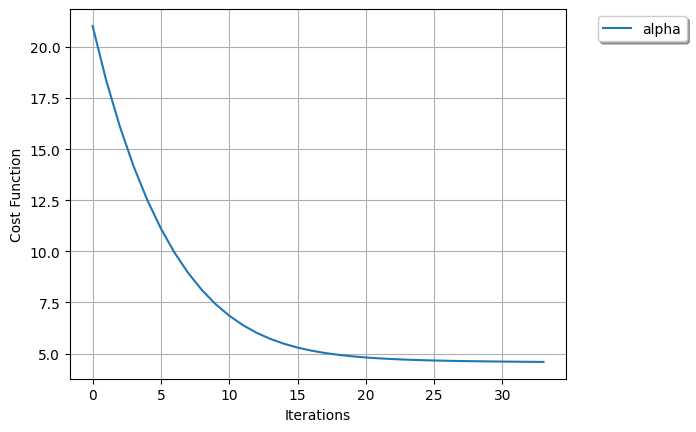

[22.6709744  -0.76573051  0.6691532  -0.42445049  0.79172615 -0.90268661
  3.10052963 -0.32942915 -2.17095762  0.63403043 -0.5137376  -2.21223574
  0.5943712  -3.34908326]
RMSE_test: 5.183123789400902
SSE_test: 4781.9294544931345


In [67]:
reg1 = LinearRegression(df.values[:, 0:-1], df.values[:,-1], tolerance = 0.005,
 learning_Rate= 0.0004, max_Iteration=50000, regulerization = True,
  regulerization_Rate = 1, batch=100, optimizer = 'GD', error = 'RMSE')
reg1.fit()

## 3.Stochastic GD

Data is full rank
data is not low rank
Stochastic Gradient Descent
Using Stochastic Gradient Descent
Using regularization


  0%|          | 97/50000 [00:00<00:04, 12255.55it/s]

Model stopped Learning


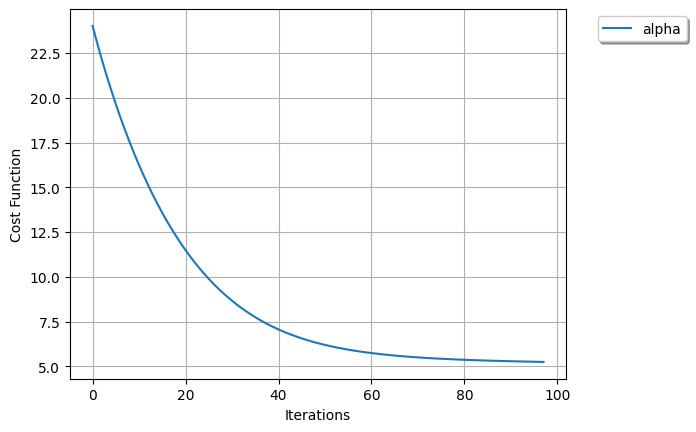

[22.48502928 -0.97630588  0.807166   -0.24568951  1.09837318 -1.34630386
  2.4050434   0.45935669 -2.38951985  1.97972767 -1.10649635 -1.57185136
  0.28369709 -4.76072949]
RMSE_test: 5.07057249875865
SSE_test: 4576.5055727998215


In [68]:
reg2 = LinearRegression(df.values[:, 0:-1], df.values[:,-1], tolerance = 0.005,
 learning_Rate= 0.0004, max_Iteration=50000, regulerization = True,  regulerization_Rate = 1, batch=100, optimizer = 'SGD', error = 'RMSE')
reg2.fit()

## b) Yacht Dataset
learning rate = 0.1 × 10−2, tolerance = 0.1 × 10−2



In [69]:
df2 = pd.read_csv('yachtData.csv', header=None)

#### 1.Normal Equation

In [70]:
reg1 = LinearRegression(df2.values[:, 0:-1], df2.values[:,-1], tolerance = 0.001,
 learning_Rate= 0.001, max_Iteration=50000, regulerization = True,
  regulerization_Rate = 1, batch=100, optimizer = 'Normal', error = 'RMSE')
reg1.fit()

Data is full rank
data is not low rank
Closed Form Solution
[11.06492537  0.38722252 -0.5568673   0.6317603  -1.19407233 -1.90900327
 12.67349837]
RMSE_test: 8.979606646144859
SSE_test: 8708.400236104802


## 2.Gradient Descent

Data is full rank
data is not low rank
Gradient Descent
Implementing Gradient Descent
Implementing regularization


  0%|          | 21/50000 [00:00<00:02, 17431.30it/s]

Model has stopped learning


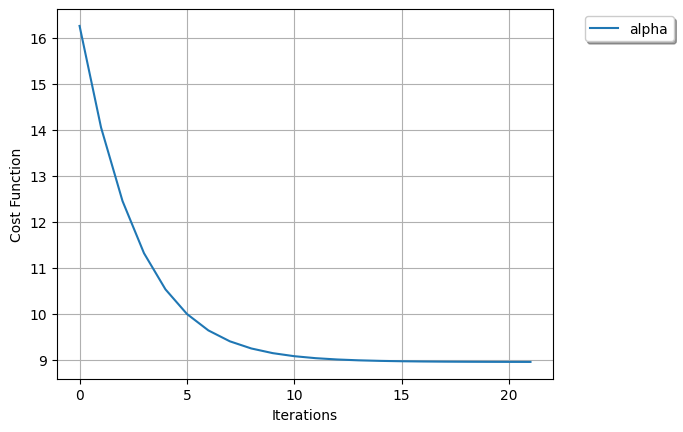

[10.98549664  0.36729279 -0.86605668 -0.5558454  -0.21865395 -0.76374485
 12.57788833]
RMSE_test: 8.967883761191155
SSE_test: 8685.67742865749


In [71]:
reg2 = LinearRegression(df2.values[:, 0:-1], df2.values[:,-1], tolerance = 0.001,
 learning_Rate= 0.001, max_Iteration=50000, regulerization = True,
  regulerization_Rate = 1, batch=100, optimizer = 'GD', error = 'RMSE')
reg2.fit()

## 3.Stochastic Gradient descent

Data is full rank
data is not low rank
Stochastic Gradient Descent
Using Stochastic Gradient Descent
Using regularization


  0%|          | 44/50000 [00:00<00:05, 9145.16it/s]

Model stopped Learning


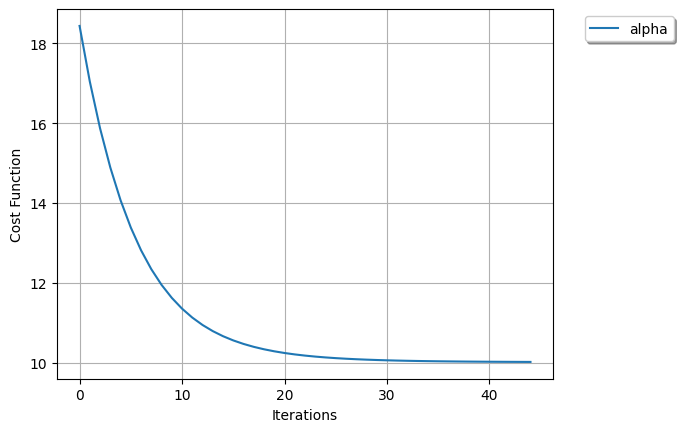

[10.4973161   0.09061939 -1.1110501  -0.59919185 -0.68728406 -0.19989156
 12.89281944]
RMSE_test: 8.842984404276734
SSE_test: 8445.424302822406


In [72]:
reg3 = LinearRegression(df2.values[:, 0:-1], df2.values[:,-1], tolerance = 0.001,
 learning_Rate= 0.001, max_Iteration=50000, regulerization = True,
  regulerization_Rate = 1, batch=100, optimizer = 'SGD', error = 'RMSE')
reg3.fit()

## C) Concrete Dataset
learning rate = 0.7 × 10−3 = 0.0007, tolerance = 0.1 × 10−3 = 0.0001



In [73]:
df3 = pd.read_csv('concreteData.csv', header=None)

#### 1.Normal Equation

In [81]:
reg1 = LinearRegression(df3.values[:, 0:-1], df3.values[:,-1], tolerance = 0.0001,
 learning_Rate= 0.0007, max_Iteration=50000, regulerization = True,
  regulerization_Rate = 1, batch=100, optimizer = 'Normal', error = 'RMSE')
reg1.fit()

Data is full rank
data is not low rank
Closed Form Solution
[35.65398507 12.54996585  9.16441772  5.60019486 -2.62533796  2.43376764
  1.63135244  1.58840293  6.98066253]
RMSE_test: 9.937574162903907
SSE_test: 35650.69226780071


## 2.Gradient Descent

Data is full rank
data is not low rank
Gradient Descent
Implementing Gradient Descent
Implementing regularization


  0%|          | 150/50000 [00:00<00:07, 6967.59it/s]

Model has stopped learning


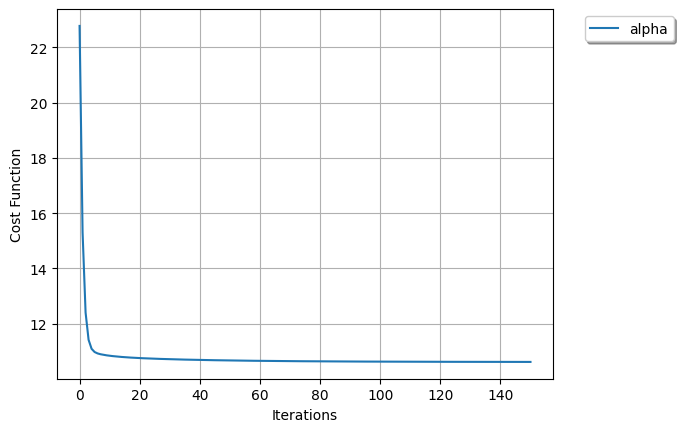

[35.65398507 12.01482184  8.62995669  5.12621519 -3.05706176  2.3856714
  1.222624    1.07850186  6.96486766]
RMSE_test: 9.932254629127888
SSE_test: 35612.53520843748


In [76]:
reg2 = LinearRegression(df3.values[:, 0:-1], df3.values[:,-1], tolerance = 0.0001,
 learning_Rate= 0.0007, max_Iteration=50000, regulerization = True,
  regulerization_Rate = 1, batch=100, optimizer = 'GD', error = 'RMSE')
reg2.fit()

## 3.Stochastic Gradient Descent

Data is full rank
data is not low rank
Stochastic Gradient Descent
Using Stochastic Gradient Descent
Using regularization


  1%|▏         | 640/50000 [00:00<00:02, 20980.86it/s]

Model stopped Learning


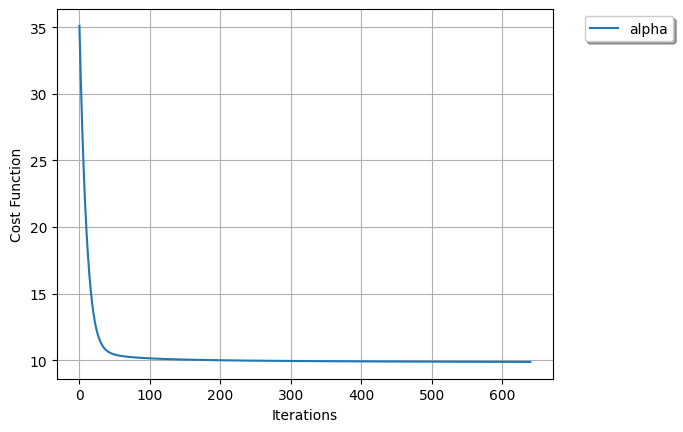

[34.71311372 10.60502672  6.67002169  5.41226321 -2.93563038  1.67007013
  0.44047598  0.06836343  7.92256387]
RMSE_test: 10.096919730113909
SSE_test: 36803.151481127235


In [78]:
reg3 = LinearRegression(df3.values[:, 0:-1], df3.values[:,-1], tolerance = 0.0001,
 learning_Rate= 0.0007, max_Iteration=50000, regulerization = True,
  regulerization_Rate = 1, batch=100, optimizer = 'SGD', error = 'RMSE')
reg3.fit()

## After fitting the algorithm we get the following results:




In [86]:
from tabulate import tabulate

# Data for SSE and RMSE values
data = [
    ["Housing", "Normal Equation", 4590.5607, 5.0783],
    ["", "Gradient Descent", 4781.92945, 5.1831],
    ["", "Stochastic Gradient Descent", 4576.5055, 5.07057],
    ["Yacht", "Normal Equation", 8708.4002, 8.9796],
    ["", "Gradient Descent",8685.67742, 8.96788],
    ["", "Stochastic Gradient Descent", 8445.42430,8.842],
    ["Concrete", "Normal Equation", 35650.69226, 9.93757 ],
    ["", "Gradient Descent", 35612.5352, 9.9322],
    ["", "Stochastic Gradient Descent", 36803.1514, 10.0969],
]

headers = ["Dataset", "Method", "SSE", "RMSE"]

table = tabulate(data, headers, tablefmt="pipe")

print(table)


| Dataset   | Method                      |      SSE |     RMSE |
|:----------|:----------------------------|---------:|---------:|
| Housing   | Normal Equation             |  4590.56 |  5.0783  |
|           | Gradient Descent            |  4781.93 |  5.1831  |
|           | Stochastic Gradient Descent |  4576.51 |  5.07057 |
| Yacht     | Normal Equation             |  8708.4  |  8.9796  |
|           | Gradient Descent            |  8685.68 |  8.96788 |
|           | Stochastic Gradient Descent |  8445.42 |  8.842   |
| Concrete  | Normal Equation             | 35650.7  |  9.93757 |
|           | Gradient Descent            | 35612.5  |  9.9322  |
|           | Stochastic Gradient Descent | 36803.2  | 10.0969  |


### i. Housing Data: a. It shows improved performance with the Normal Form, as it produces a lower Root Mean Square Error (RMSE).
### ii. Yacht dataset: Stochastic Gradient Descent stands out as the preferred choice, showcasing a reduced RMSE.

### iii. Concrete dataset: Gradient Descent proves to be the more effective option, resulting in a lower RMSE.

### About GD and SGD The graphs show that a fast learning rate causes the cost function to converge rapidly and need minimal iterations, but it also results in large costs because the optimal value of theta is lost during the quick convergence. Therefore, the learning rate needs to be adjusted to the proper alpha value.
### Regularization reduces error, and our cost function can be varied by selecting the Normal, Gradient Descent, or Stochastic GD options.